# Machine-Learning-Terrorism-Prediction

Organise imports

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns
    
import numpy as np
    
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

## Load the csv dataset

In [2]:
path = './data/globalterrorismdb.csv'
columnNames = pd.read_csv(path, encoding="utf-8").columns.tolist()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,6,13,19,20,25,26,30,31,32,33,34,36,40,42,44,48,50,52,53,56,61,62,63,65,66,67,68,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,96,99,100,101,102,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Create a dataframe

In [3]:
dataFrame = pd.read_csv(path, names=columnNames)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,13,14,15,16,19,20,21,22,23,25,26,27,28,30,31,32,33,34,36,40,42,44,48,50,52,53,56,61,62,63,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,95,96,99,100,101,102,103,104,105,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's print our number of columns (possible features)

In [4]:
dataFrame.columns.size

140

Let's list them all

In [5]:
list(dataFrame.columns.values)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Official columns attribute description:

- **eventid**: A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).

- **iyear**: This field contains the year in which the incident occurred.
- **imonth**: This field contains the number of the month in which the incident occurred.
- **iday**: This field contains the numeric day of the month on which the incident occurred.

- **extended**: 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less than 24 hours.

- **country**: This field identifies the country code
- **country_txt**: This field identifies the country or location where the incident occurred.
- **region**: This field identifies the region code based on 12 regions
- **region_txt**: This field identifies the region in which the incident occurred.
- **provstate**: Name (at the time of event) of the 1st order subnational administrative region
- **city**: Name of the city, village, or town in which the incident occurred
- **latitude**: The latitude of the city in which the event occurred.
- **longitude**: The longitude of the city in which the event occurred.

- **success**: Success of a terrorist strike
- **suicide**: 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
- **attacktype1**: The general method of attack
- **attacktype1_txt**: The general method of attack and broad class of tactics used.

- **targtype1_txt**: The general type of target/victim
- **targsubtype1_txt**: The more specific target category

- **target1**: The specific person, building, installation that was targeted and/or victimized

- **natlty1_txt**: The nationality of the target that was attacked

- **gname**: The name of the group that carried out the attack
- **gsubname**: Additional details about group that carried out the attack like factions

- **nperps**: The total number of terrorists participating in the incident

- **weaptype1_txt**: General type of weapon used in the incident
- **weapsubtype1_txt**: More specific value for most of the Weapon Types

- **nkill**: The number of total confirmed fatalities for the incident
- **nkillus**: The number of U.S. citizens who died as a result of the incident
- **nwound**: Number of confirmed non-fatal injuries to both perpetrators and victims.
- **nwoundus**: The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims.

Let's only keep the documented features in our dataframe. This will make the analysis easier.

In [6]:
categoryList = ['eventid',
                'iyear',
                'imonth',
                'iday',
                'extended',
                'country',
                'country_txt',
                'region',
                'region_txt',
                'provstate',
                'city',
                'latitude',
                'longitude',
                'success',
                'suicide',
                'attacktype1',
                'attacktype1_txt',
                'targtype1_txt',
                'targsubtype1_txt',
                'target1',
                'natlty1_txt',
                'gname',
                'gsubname',
                'nperps',
                'weaptype1_txt',
                'weapsubtype1_txt',
                'nkill',
                'nkillus',
                'nwound',
                'nwoundus'
               ]

In [7]:
selectedDataFrame = dataFrame[categoryList]
selectedDataFrame.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
0,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
1,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
2,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,Belgium,23rd of September Communist League,NaN,7,Unknown,NaN,0,NaN,0,NaN
3,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,United States,Unknown,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
4,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,United States,Unknown,NaN,NaN,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,NaN


In [8]:
selectedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170351 entries, 0 to 170350
Data columns (total 30 columns):
eventid             170351 non-null object
iyear               170351 non-null object
imonth              170351 non-null object
iday                170351 non-null object
extended            170351 non-null object
country             170351 non-null object
country_txt         170351 non-null object
region              170351 non-null object
region_txt          170351 non-null object
provstate           155849 non-null object
city                169905 non-null object
latitude            165746 non-null object
longitude           165745 non-null object
success             170335 non-null object
suicide             170351 non-null object
attacktype1         170351 non-null object
attacktype1_txt     170351 non-null object
targtype1_txt       170328 non-null object
targsubtype1_txt    161008 non-null object
target1             169709 non-null object
natlty1_txt         168957 no

## Browse our data before going further

Country occurence

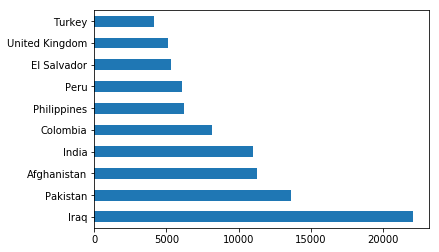

In [9]:
selectedDataFrame['country_txt'].value_counts()[:10].plot(kind='barh')

City occurence

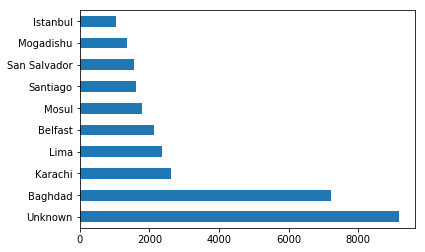

In [10]:
selectedDataFrame['city'].value_counts()[:10].plot(kind='barh')

General method of attack and broad class of tactics used occurence

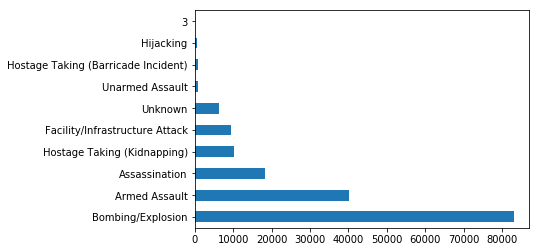

In [11]:
selectedDataFrame['attacktype1_txt'].value_counts()[:10].plot(kind='barh')

General type of weapon used in the incident occurence

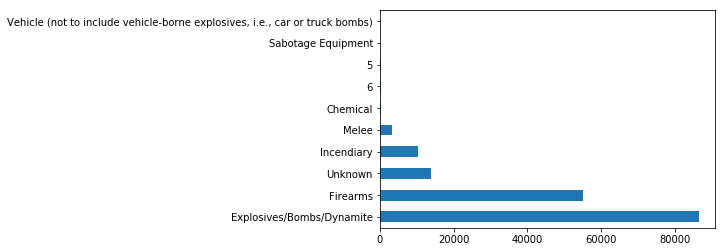

In [12]:
selectedDataFrame['weaptype1_txt'].value_counts()[:10].plot(kind='barh')

Number of total confirmed fatalities for the incident occurence

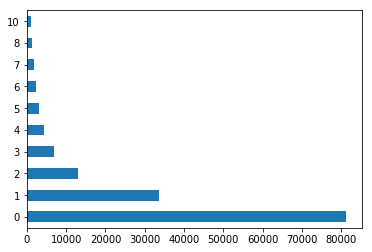

In [13]:
selectedDataFrame['nkill'].value_counts()[:10].plot(kind='barh')

## Label Encoding

There are null values in the data that we need to clean up.

In [14]:
selectedDataFrame[selectedDataFrame.isnull().any(axis=1)]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
1,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
2,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,Belgium,23rd of September Communist League,NaN,7,Unknown,NaN,0,NaN,0,NaN
3,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,United States,Unknown,NaN,NaN,Unknown,NaN,1,NaN,0,NaN
4,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,United States,Unknown,NaN,NaN,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,NaN
5,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN
6,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,United States,Black Nationalists,NaN,-99,Firearms,Unknown Gun Type,0,0,0,0
7,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,Uruguay,Tupamaros (Uruguay),NaN,3,Firearms,Automatic Weapon,0,NaN,0,NaN
8,197001020002,1970,1,2,0,217,United States,1,North America,California,...,United States,Unknown,NaN,-99,Explosives/Bombs/Dynamite,Unknown Explosive Type,0,0,0,0
9,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,United States,New Year's Gang,NaN,1,Incendiary,Molotov Cocktail/Petrol Bomb,0,0,0,0
10,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,United States,New Year's Gang,NaN,1,Incendiary,Gasoline or Alcohol,0,0,0,0


Just fill in the values.

In [15]:
selectedDataFrame["provstate"].value_counts()

Baghdad                                7238
Northern Ireland                       4405
Balochistan                            3377
Unknown                                3199
Sindh                                  3146
Saladin                                3103
Khyber Pakhtunkhwa                     2967
Al Anbar                               2911
Diyala                                 2680
Lima                                   2613
Nineveh                                2536
Federally Administered Tribal Areas    2222
Jammu and Kashmir                      2197
Antioquia                              1886
Punjab                                 1729
Santiago Metropolitan                  1635
West Bank                              1509
Kirkuk                                 1491
Basque Country                         1446
Banaadir                               1374
Corsica                                1340
Eastern                                1281
Northern                        

In [16]:
selectedDataFrame = selectedDataFrame.fillna({"provstate": "Unknown"})

In [17]:
selectedDataFrame = selectedDataFrame.fillna({"gsubname": "Unknown"})

In [18]:
selectedDataFrame = selectedDataFrame.fillna({"nperps": "-1"})

In [19]:
selectedDataFrame = selectedDataFrame.fillna({"weapsubtype1_txt": "Unknown"})

In [20]:
selectedDataFrame = selectedDataFrame.fillna({"nkill": "-1"})

In [21]:
selectedDataFrame = selectedDataFrame.fillna({"nkillus": "-1"})

In [22]:
selectedDataFrame = selectedDataFrame.fillna({"nwound": "-1"})

In [23]:
selectedDataFrame = selectedDataFrame.fillna({"nwoundus": "-1"})

In [24]:
selectedDataFrame[selectedDataFrame.isnull().any(axis=1)]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus
16,197001100001,1970,1,10,0,499,East Germany (GDR),9,Eastern Europe,Unknown,...,Germany,Commune 1,Unknown,-1,Explosives/Bombs/Dynamite,Unknown Explosive Type,-1,-1,-1,-1
17,197001110001,1970,1,11,0,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,United States,Eritrean Liberation Front,Unknown,1,Unknown,Unknown,1,-1,0,-1
29,197001220002,1970,1,22,0,217,United States,1,North America,Nebraska,...,United States,Strikers,Unknown,-99,Explosives/Bombs/Dynamite,Dynamite/TNT,0,0,0,0
37,197001300001,1970,1,30,0,217,United States,1,North America,Nebraska,...,United States,Strikers,Unknown,-99,Explosives/Bombs/Dynamite,Dynamite/TNT,0,0,0,0
47,197002040001,1970,2,4,0,217,United States,1,North America,Ohio,...,United States,Strikers,Unknown,-99,Explosives/Bombs/Dynamite,Dynamite/TNT,0,0,0,0
50,197002060003,1970,2,6,0,217,United States,1,North America,Washington,...,United States,White extremists,Unknown,-99,Explosives/Bombs/Dynamite,Dynamite/TNT,0,0,0,0
52,197002060005,1970,2,6,0,217,United States,1,North America,Puerto Rico,...,United States,Armed Revolutionary Independence Movement (MIRA),Unknown,-99,Incendiary,Molotov Cocktail/Petrol Bomb,0,0,0,0
56,197002080001,1970,2,8,0,217,United States,1,North America,New York,...,217,NaN,Armed Revolutionary Independence Movement (MIRA),0,6,16,-1,0,0,0
57,197002080002,1970,2,8,0,217,United States,1,North America,New York,...,217,NaN,Armed Revolutionary Independence Movement (MIRA),0,6,17,18-inch pipe bomb,0,0,0
61,197002110001,1970,2,11,0,217,United States,1,North America,Michigan,...,United States,Student Radicals,Unknown,-99,Incendiary,Molotov Cocktail/Petrol Bomb,0,0,0,0


Now that the data does not have any null/NaN values, we can look at options for encoding the categorical values.

Make analysis simpler by encoding our string variables.

In [25]:
# labelEncoder = LabelEncoder()
# encodedDataFrame = selectedDataFrame.apply(labelEncoder.fit_transform)
# print(encodedDataFrame)

Note: The above technique is good if you are not interested in converting them back.

In [ ]:
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

class MultiColumnLabelEncoder(LabelEncoder):
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values.astype(str))
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values.astype(str))
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values.astype(str))
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                        dframe.loc[:, column].values.astype(str))
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return dframe

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[
                    idx].transform(dframe.loc[:, column].values.astype(str))
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .transform(dframe.loc[:, column].values.astype(str))
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values.astype(str))
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values.astype(str))
        return dframe

Instantiate MultiColumnLabelEncoder

In [27]:
multiColumnLabelEncoder = MultiColumnLabelEncoder(columns = selectedDataFrame.columns)

Fit to selectedDataFrame data

In [28]:
multiColumnLabelEncoder.fit(selectedDataFrame)

TypeError: '<' not supported between instances of 'str' and 'int'

Transform selectedDataFrame data

In [ ]:
multiColumnLabelEncoder.transform(selectedDataFrame)

In [ ]:
multiColumnLabelEncoder.all_classes_

In [ ]:
multiColumnLabelEncoder.all_encoders_

In [ ]:
# multiColumnLabelEncoder.all_labels_

In [ ]:
selectedDataFrame.head()

Inverse transform selectedDataFrame data

In [ ]:
multiColumnLabelEncoder.inverse_transform(selectedDataFrame).head()

In [ ]:
multiColumnLabelEncoder.transform(selectedDataFrame)

The default pairs plot by itself can give us valuable insights.

In [ ]:
varList = [
#                 'eventid',
#                 'iyear',
#                 'imonth',
#                 'iday',
#                 'extended',
#                 'country',
#                 'country_txt',
#                 'region',
#                 'region_txt',
#                 'provstate',
#                 'city',
#                 'latitude',
#                 'longitude',
#                 'success',
#                 'suicide',
                'attacktype1',
                'attacktype1_txt',
                'targtype1_txt',
                'targsubtype1_txt',
                'target1',
#                 'natlty1_txt',
#                 'gname',
#                 'gsubname',
#                 'nperps',
                'weaptype1_txt',
                'weapsubtype1_txt',
                'nkill',
                'nkillus',
                'nwound',
                'nwoundus'
            ]

In [ ]:
sns.pairplot(encodedDataFrame, vars = varList)

## Split our data into labels and features

Let's split our data into labels and features. Labels are the data which we want to predict and features are the data which are used to predict labels.

In [ ]:
target = selectedDataFrame['dtt.fortigate.subtype']
data = selectedDataFrame.drop('dtt.fortigate.subtype', axis=1)
print(target.shape)
print(data.shape)

In [ ]:
target.head()

In [ ]:
data.head()

Here, we have used temp as the label for predicting temperatures in y, data other than temp is taken as features using the drop() function in X.

## Split our data into train and test data

test_size=0.30 is used to indicate that the test data should be 30% of the total data and rest 70% should be train data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

Training data

In [ ]:
X_train.shape

In [ ]:
y_train.shape

Testing data

In [ ]:
X_test.shape

In [ ]:
y_test.shape

We used head() function to print the first five elements of both the data. The shape() function was used to get an idea about the rows and columns of the data we have obtained.

## Scaling

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

Example from [scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

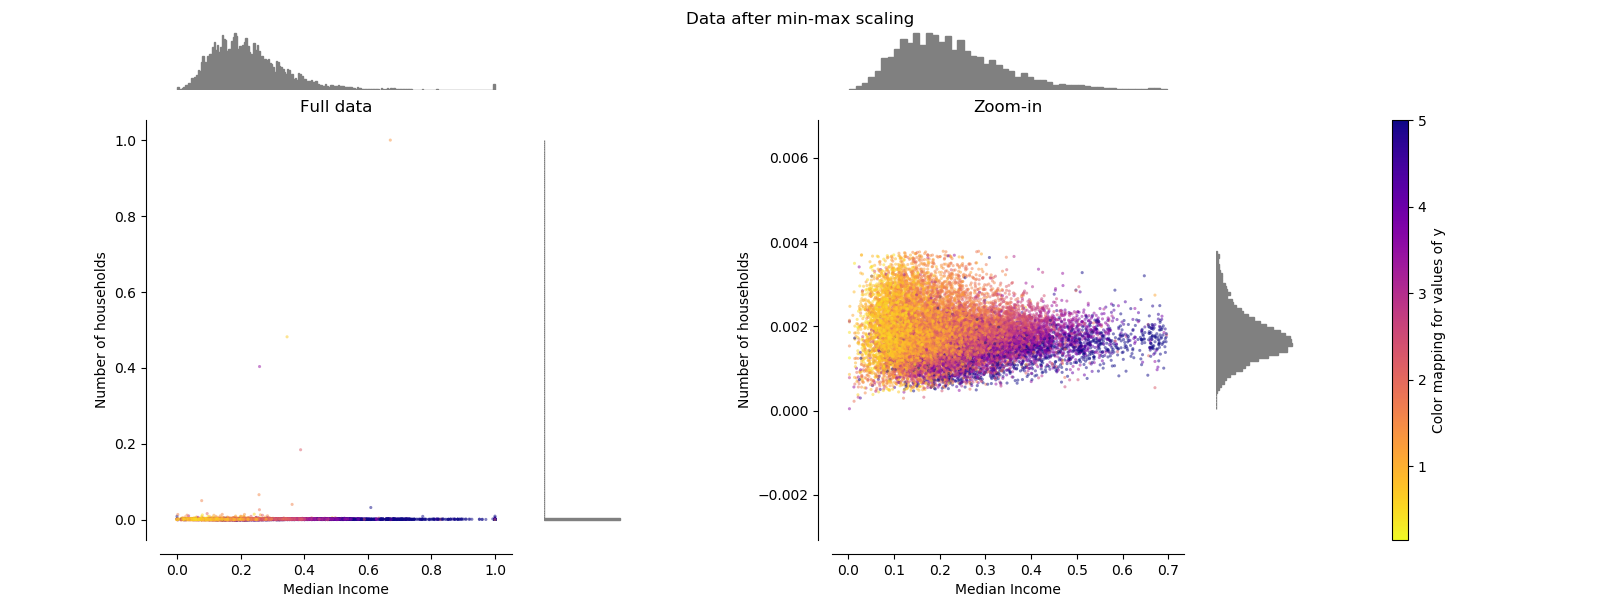

Transform our train data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)

Dataset properties before and after scaling

In [ ]:
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

Transform our test data

In [ ]:
X_test_scaled = scaler.transform(X_test)

Dataset properties before and after scaling

In [ ]:
print("transformed shape: {}".format(X_test_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

At this point our scaled data has the same format as our original data. Our scaled data feature are only shifted and scaled between 0 and 1.

## Support Vector Machines

Support Vector Machines are perhaps one of the most popular and talked about machine learning algorithms.

A hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to best separate the points in the input variable space by their class, either class 0 or class 1. In two-dimensions, you can visualize this as a line and let’s assume that all of our input points can be completely separated by this line. The SVM learning algorithm finds the coefficients that results in the best separation of the classes by the hyperplane.

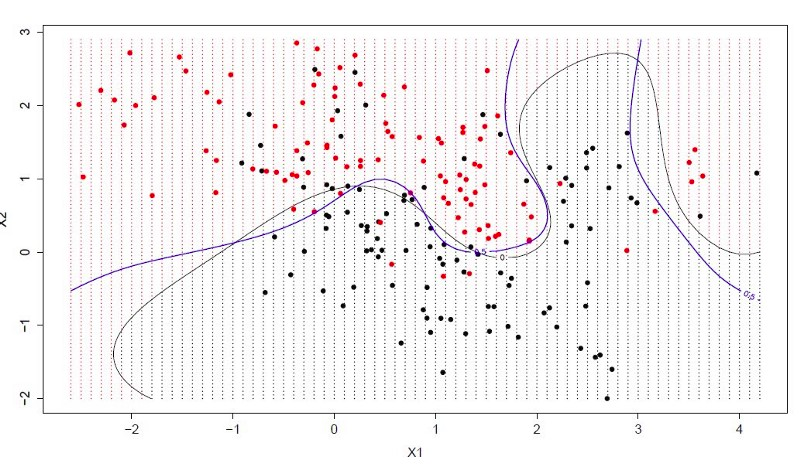

The distance between the hyperplane and the closest data points is referred to as the margin. The best or optimal hyperplane that can separate the two classes is the line that has the largest margin. Only these points are relevant in defining the hyperplane and in the construction of the classifier. These points are called the support vectors. They support or define the hyperplane. In practice, an optimization algorithm is used to find the values for the coefficients that maximizes the margin.

SVM might be one of the most powerful out-of-the-box classifiers and worth trying on your dataset.

[Source](https://towardsdatascience.com/a-tour-of-the-top-10-algorithms-for-machine-learning-newbies-dde4edffae11)

## The effect of preprocessing on supervised learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

svm = SVC(C=100, gamma='scale')
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

### Preprocessing using 0-1 scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

In [ ]:
X_test.head()

In [ ]:
y_test.iloc[0]

In [ ]:
X_test.iloc[0]

In [ ]:
X_test.iloc[0].name

In [ ]:
X_test.iloc[0, :]

In [ ]:
testRow = X_test.iloc[0, :].to_numpy()

In [ ]:
prediction = svm.predict(testRow.reshape(-1, 9))
print(prediction[0])

In [ ]:
selectedDataFrame.iloc[X_test.iloc[0].name,:]

In [ ]:
multiColumnLabelEncoder.inverse_transform(selectedDataFrame)

In [ ]:
selectedDataFrame.iloc[X_test.iloc[0].name,:]

### Preprocessing using zero mean and unit variance scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

## Manifold Learning with t-SNE

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(features)
# transform the features data onto the first two principal components
features_pca = pca.transform(features)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(features_pca[:, 0].min(), features_pca[:, 0].max())
plt.ylim(features_pca[:, 1].min(), features_pca[:, 1].max())
for i in range(len(features)):
    # actually plot the features as text
    plt.text(features_pca[i, 0], features_pca[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
features_tsne = tsne.fit_transform(features)

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(features_tsne[:, 0].min(), features_tsne[:, 0].max() + 1)
plt.ylim(features_tsne[:, 1].min(), features_tsne[:, 1].max() + 1)
for i in range(len(features)):
    # actually plot the digits as text instead of using scatter
    plt.text(features_tsne[i, 0], features_tsne[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification. It will plot the decision boundaries for each class.

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(features)
# transform the features data onto the first two principal components
features_pca = pca.transform(features)

In [ ]:
features_pca.shape

In [ ]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = features_pca
y = labels


# n_neighbors = 4
n_list = [1, 2, 3, 5, 8, 13, 21, 34]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n in n_list:
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n, weights))

plt.show()